## Download and import vader

In [1]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download()
nltk.downloader.download('vader_lexicon')

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/yidanzhang/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

## Import packages

In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

## Change

In [3]:
all_data = pd.read_csv("all_k_line.txt")
all_data.head()

,Time,Price,Volume,Change
0,1514736000,13371.5,293805,-0.32
1,1514736060,13405.5,219089,-0.25
2,1514736120,13450.0,651858,-0.33
3,1514736180,13528.0,1433129,-0.58
4,1514736240,13616.0,4301649,-0.65


In [4]:
from datetime import datetime
all_data['Time'] = [datetime.fromtimestamp(x) for x in all_data['Time']]
all_data[['Date','Time']] = all_data['Time'].astype(str).str.split(' ',expand=True)
all_data

,Time,Price,Volume,Change,Date
0,08:00:00,13371.5,293805,-0.32,2017-12-31
1,08:01:00,13405.5,219089,-0.25,2017-12-31
2,08:02:00,13450.0,651858,-0.33,2017-12-31
3,08:03:00,13528.0,1433129,-0.58,2017-12-31
4,08:04:00,13616.0,4301649,-0.65,2017-12-31
5,08:05:00,13683.0,2993575,-0.49,2017-12-31
6,08:06:00,13705.0,3148908,-0.16,2017-12-31
7,08:07:00,13687.0,4065627,0.13,2017-12-31
8,08:08:00,13690.0,2341692,-0.02,2017-12-31
9,08:09:00,13705.5,884267,-0.11,2017-12-31


In [5]:
all_change_data = all_data[['Date', ' Change']]
all_change_data = all_change_data.groupby("Date")
mean_all_change = all_change_data.mean()
mean_all_change = mean_all_change.reset_index()
mean_all_change

,Date,Change
0,2017-12-31,-0.002552
1,2018-01-01,0.000840
2,2018-01-02,-0.009598
3,2018-01-03,0.001846
4,2018-01-04,-0.000097
5,2018-01-05,-0.007120
6,2018-01-06,-0.000756
7,2018-01-07,0.003158
8,2018-01-08,0.002935
9,2018-01-09,0.004865


In [6]:
mean_all_change['Date'] = pd.to_datetime(mean_all_change['Date'])
change_mask1 = (mean_all_change['Date'] >= '2019-1-1') & (mean_all_change['Date'] <= '2019-6-30')
train_change_data1 = mean_all_change.loc[change_mask1]
train_change_data1

,Date,Change
366,2019-01-01,-0.001728
367,2019-01-02,-0.001055
368,2019-01-03,0.000736
369,2019-01-04,-0.000285
370,2019-01-05,0.000687
371,2019-01-06,-0.004532
372,2019-01-07,0.000895
373,2019-01-08,-0.000680
374,2019-01-09,0.003914
375,2019-01-10,0.002838


In [7]:
mean_all_change['Date'] = pd.to_datetime(mean_all_change['Date'])
change_mask2 = (mean_all_change['Date'] >= '2020-1-1') & (mean_all_change['Date'] <= '2020-6-30')
train_change_data2 = mean_all_change.loc[change_mask2]
train_change_data2

,Date,Change
731,2020-01-01,1.054823e-03
732,2020-01-02,-1.061763e-03
733,2020-01-03,-1.450382e-03
734,2020-01-04,-1.096461e-03
735,2020-01-05,-3.192228e-04
736,2020-01-06,-3.442054e-03
737,2020-01-07,-3.469813e-03
738,2020-01-08,2.900763e-03
739,2020-01-09,1.623872e-03
740,2020-01-10,-2.845246e-03


In [8]:
train_change_data1.to_csv("new_change.csv",index=False)

In [9]:
train_change_data2.to_csv("new_change2020.csv",index=False)

In [10]:
update_change = pd.read_csv("data_change.csv")
update_change

,Date,Change,Sign
0,2019-01-01,-0.001728,-1
1,2019-01-02,-0.001055,-1
2,2019-01-03,0.000736,1
3,2019-01-04,-0.000285,-1
4,2019-01-05,0.000687,1
5,2019-01-06,-0.004532,-1
6,2019-01-07,0.000895,1
7,2019-01-08,-0.000680,-1
8,2019-01-09,0.003914,1
9,2019-01-10,0.002838,1


In [11]:
update_change2020 = pd.read_csv("data_change2020.csv")
update_change2020

,Date,Change,Sign
0,2020-01-01,1.054823e-03,1
1,2020-01-02,-1.061763e-03,-1
2,2020-01-03,-1.450382e-03,-1
3,2020-01-04,-1.096461e-03,-1
4,2020-01-05,-3.192228e-04,-1
5,2020-01-06,-3.442054e-03,-1
6,2020-01-07,-3.469813e-03,-1
7,2020-01-08,2.900763e-03,1
8,2020-01-09,1.623872e-03,1
9,2020-01-10,-2.845246e-03,-1


## 1. Read all data from news.csv

In [12]:
sample_list = ["Title", "Date", "Time", "Content"]
sample_data = pd.read_csv('news_updated.csv', usecols=sample_list).astype(str) 
sample_data.head()

,Title,Date,Time,Content
0,Bitcoin price hits $34K as trader forecasts fr...,2021-07-24,15:46:15,"<p>Bitcoin (<a href=""https://cointelegraph.com..."
1,Bitcoin price hints at 'megaphone' bottom patt...,2021-07-24,13:42:02,"<p>Bitcoin's (<a href=""https://cointelegraph.c..."
2,Just HODL! Bitcoin and Ethereum outperform ‘lo...,2021-07-24,01:05:00,"<p>In the past two decades, index and exchange..."
3,"Price analysis 7/23: BTC, ETH, BNB, ADA, XRP, ...",2021-07-23,18:26:09,"<p>Bitcoin’s (<a href=""https://cointelegraph.c..."
4,Bitcoin payments for real estate gain traction...,2021-07-23,17:15:24,<p>Crypto investors are betting big on real es...


### Calculate Sentiment Scores

In [13]:
vader = SentimentIntensityAnalyzer()
content = sample_data['Content']
content = str(content).encode('utf-8')
scores = sample_data['Content'].apply(lambda content:vader.polarity_scores(content)).tolist()
scores_df = pd.DataFrame(scores)
scores_df.head()

,compound,neg,neu,pos
0,0.9811,0.011,0.903,0.085
1,0.8581,0.064,0.868,0.068
2,0.9961,0.031,0.841,0.128
3,0.9951,0.067,0.840,0.093
4,0.9966,0.012,0.905,0.083


### Add scores to original data frame

In [14]:
scored_news = sample_data.join(scores_df, rsuffix='_right')
scored_news

,Title,Date,Time,Content,compound,neg,neu,pos
0,Bitcoin price hits $34K as trader forecasts fr...,2021-07-24,15:46:15,"<p>Bitcoin (<a href=""https://cointelegraph.com...",0.9811,0.011,0.903,0.085
1,Bitcoin price hints at 'megaphone' bottom patt...,2021-07-24,13:42:02,"<p>Bitcoin's (<a href=""https://cointelegraph.c...",0.8581,0.064,0.868,0.068
2,Just HODL! Bitcoin and Ethereum outperform ‘lo...,2021-07-24,01:05:00,"<p>In the past two decades, index and exchange...",0.9961,0.031,0.841,0.128
3,"Price analysis 7/23: BTC, ETH, BNB, ADA, XRP, ...",2021-07-23,18:26:09,"<p>Bitcoin’s (<a href=""https://cointelegraph.c...",0.9951,0.067,0.840,0.093
4,Bitcoin payments for real estate gain traction...,2021-07-23,17:15:24,<p>Crypto investors are betting big on real es...,0.9966,0.012,0.905,0.083
5,Canadian border town suspends Bitcoin mining o...,2021-07-23,16:41:49,"<p>Massena, a town in New York along the borde...",0.9612,0.006,0.919,0.075
6,"Bull or bear market, creators are diving headf...",2021-07-23,16:13:00,<p>After an astronomical bull run into the beg...,0.9983,0.012,0.894,0.094
7,"$60K is now more likely for Bitcoin than $20K,...",2021-07-23,16:12:12,"<p>Bitcoin (<a href=""https://cointelegraph.com...",-0.9313,0.063,0.887,0.050
8,SEC Commissioner concerned about the US laggin...,2021-07-23,14:57:53,<p>Securities and Exchange Commissioner <a hre...,-0.6876,0.053,0.913,0.034
9,Illusion or reality? Crypto demand either falt...,2021-07-23,14:03:17,<p>BlackRock is the world’s largest asset mana...,0.9990,0.035,0.835,0.130


In [15]:
group_scored_news = scored_news.groupby("Date")
mean_scored_news = group_scored_news.mean()
mean_scored_news = mean_scored_news.reset_index()

In [16]:
mean_scored_news.head()

,Date,compound,neg,neu,pos
0,2018-12-25,-0.047950,0.043500,0.918000,0.03850
1,2018-12-26,0.687233,0.026833,0.912333,0.06100
2,2018-12-27,-0.203940,0.069800,0.881400,0.04880
3,2018-12-28,0.385650,0.048333,0.889167,0.06250
4,2018-12-29,-0.089475,0.065250,0.887000,0.04825


### Data between 2019-01-01 ~ 2019-06-30

In [17]:
mean_scored_news['Date'] = pd.to_datetime(mean_scored_news['Date'])
mask1 = (mean_scored_news['Date'] >= '2019-1-1') & (mean_scored_news['Date'] <= '2019-6-30')
train_data1 = mean_scored_news.loc[mask1] #Index(['Date', 'compound', 'neg', 'neu', 'pos'], dtype='object')
train_data1

,Date,compound,neg,neu,pos
7,2019-01-01,-0.284267,0.043500,0.924667,0.031667
8,2019-01-02,0.041388,0.043125,0.909750,0.047375
9,2019-01-03,0.375067,0.040667,0.888333,0.071500
10,2019-01-04,0.328850,0.039000,0.927500,0.033500
11,2019-01-05,0.331000,0.050500,0.893500,0.056000
12,2019-01-06,-0.977000,0.103000,0.847500,0.049500
13,2019-01-07,0.421673,0.030455,0.909545,0.060182
14,2019-01-08,0.438943,0.037714,0.895857,0.066429
15,2019-01-09,0.284333,0.043167,0.886167,0.070500
16,2019-01-10,-0.084240,0.038600,0.915000,0.046400


In [18]:
train_data1.to_csv("new_score.csv",index=False)

In [19]:
score_data = pd.read_csv('update_score.csv')
score_data

,Date,compound,neg,neu,pos
0,2019-01-01,-0.284267,0.043500,0.924667,0.031667
1,2019-01-02,0.041388,0.043125,0.909750,0.047375
2,2019-01-03,0.375067,0.040667,0.888333,0.071500
3,2019-01-04,0.328850,0.039000,0.927500,0.033500
4,2019-01-05,0.331000,0.050500,0.893500,0.056000
5,2019-01-06,-0.977000,0.103000,0.847500,0.049500
6,2019-01-07,0.421673,0.030455,0.909545,0.060182
7,2019-01-08,0.438943,0.037714,0.895857,0.066429
8,2019-01-09,0.284333,0.043167,0.886167,0.070500
9,2019-01-10,-0.084240,0.038600,0.915000,0.046400


## 2. Google Trends (googletrends.csv)

In [20]:
google_trends_data = pd.read_csv('googletrends_data.csv')
google_trends_data.head()

,Date,Interest
0,2019-01-01,9
1,2019-01-02,9
2,2019-01-03,9
3,2019-01-04,9
4,2019-01-05,9


## 3. S2F Factor 
#### totalbitcoins.csv

In [21]:
s2f_data = pd.read_csv('data_btc_cir.csv')
s2f_data

,Date,Cir
0,2019-01-01,17458912.5
1,2019-01-02,17458912.5
2,2019-01-03,17464650.0
3,2019-01-04,17464650.0
4,2019-01-05,17464650.0
5,2019-01-06,17470437.5
6,2019-01-07,17470437.5
7,2019-01-08,17470437.5
8,2019-01-09,17476150.0
9,2019-01-10,17476150.0


In [22]:
s2f_data["s2f"] = 21000000 / s2f_data["Cir"]
s2f_data.head()

,Date,Cir,s2f
0,2019-01-01,17458912.5,1.202824
1,2019-01-02,17458912.5,1.202824
2,2019-01-03,17464650.0,1.202429
3,2019-01-04,17464650.0,1.202429
4,2019-01-05,17464650.0,1.202429


## 4. Volatility

In [23]:
volat_data = pd.read_csv('volatility_data.csv')
volat_data.head()

,Date,Volatility
0,2019-01-01,6.44
1,2019-01-02,6.31
2,2019-01-03,5.22
3,2019-01-04,6.11
4,2019-01-05,4.85


## 5. Volume

In [24]:
volume_data = pd.read_csv("price_volume.csv")
volume_data.head()

,Time,Price,Volume,Change
0,1514736000,13371.5,293805,-0.32
1,1514736060,13405.5,219089,-0.25
2,1514736120,13450.0,651858,-0.33
3,1514736180,13528.0,1433129,-0.58
4,1514736240,13616.0,4301649,-0.65


In [25]:
from datetime import datetime
volume_data['Time'] = [datetime.fromtimestamp(x) for x in volume_data['Time']]
volume_data[['Date','Time']] = volume_data['Time'].astype(str).str.split(' ',expand=True)
volume_data

,Time,Price,Volume,Change,Date
0,08:00:00,13371.5,293805,-0.32,2017-12-31
1,08:01:00,13405.5,219089,-0.25,2017-12-31
2,08:02:00,13450.0,651858,-0.33,2017-12-31
3,08:03:00,13528.0,1433129,-0.58,2017-12-31
4,08:04:00,13616.0,4301649,-0.65,2017-12-31
5,08:05:00,13683.0,2993575,-0.49,2017-12-31
6,08:06:00,13705.0,3148908,-0.16,2017-12-31
7,08:07:00,13687.0,4065627,0.13,2017-12-31
8,08:08:00,13690.0,2341692,-0.02,2017-12-31
9,08:09:00,13705.5,884267,-0.11,2017-12-31


In [26]:
volume_data = volume_data[['Date', ' Volume']]
group_volume_data = volume_data.groupby("Date")
sum_volume = group_volume_data.sum()
sum_volume = sum_volume.reset_index()

In [27]:
sum_volume

,Date,Volume
0,2017-12-31,454478678
1,2018-01-01,680516250
2,2018-01-02,944152848
3,2018-01-03,817351695
4,2018-01-04,698479219
5,2018-01-05,1120370625
6,2018-01-06,731720506
7,2018-01-07,959948383
8,2018-01-08,1414220400
9,2018-01-09,1018322163


In [28]:
sum_volume['Date'] = pd.to_datetime(sum_volume['Date'])

In [29]:
price_mask1 = (sum_volume['Date'] >= '2019-1-1') & (sum_volume['Date'] <= '2019-6-30')
train_volume_data1 = sum_volume.loc[price_mask1]
train_volume_data1

,Date,Volume
366,2019-01-01,979039368
367,2019-01-02,1097663564
368,2019-01-03,889059787
369,2019-01-04,923185106
370,2019-01-05,640874439
371,2019-01-06,1135382157
372,2019-01-07,983979089
373,2019-01-08,1299810701
374,2019-01-09,1300895254
375,2019-01-10,1288240535


In [30]:
train_volume_data1.to_csv("new_volume.csv",index=False)

In [31]:
update_volume = pd.read_csv("update_volume.csv")
update_volume

,Date,Volume,Volume (in 100 million)
0,2019-01-01,979039368,9.79
1,2019-01-02,1097663564,10.98
2,2019-01-03,889059787,8.89
3,2019-01-04,923185106,9.23
4,2019-01-05,640874439,6.41
5,2019-01-06,1135382157,11.35
6,2019-01-07,983979089,9.84
7,2019-01-08,1299810701,13.00
8,2019-01-09,1300895254,13.01
9,2019-01-10,1288240535,12.88


## 6. 市场占有率

In [32]:
total_market_data = pd.read_csv("data_all_market.csv")
total_market_data.head()

,Time,Market_value,Market_value (1000 million),Volume,Volume (100 million),Price
0,1546329600,1.268682e+11,12.69,11785290583,11.79,0
1,1546336800,1.268571e+11,12.69,11592072892,11.59,0
2,1546344000,1.272412e+11,12.72,11147792348,11.15,0
3,1546351200,1.266487e+11,12.66,11038633650,11.04,0
4,1546358400,1.261266e+11,12.61,10871049331,10.87,0


In [33]:
btc_market_data = pd.read_csv("data_btc.csv")
btc_market_data.head()

,Time,Market_value,Market_value (1000 million),Volume,Volume (100 million),Price
0,1546329600,65772855297,6.58,3596462198,3.60,3767.84
1,1546336800,65727202971,6.57,3529499965,3.53,3765.21
2,1546344000,65771434479,6.58,3377490200,3.38,3767.72
3,1546351200,65503541807,6.55,3343981722,3.34,3752.34
4,1546358400,65358629130,6.54,3258779578,3.26,3744.00


In [34]:
from datetime import datetime
total_market_data['Time'] = [datetime.fromtimestamp(x) for x in total_market_data['Time']]
total_market_data[['Date','Time']] = total_market_data['Time'].astype(str).str.split(' ',expand=True)
total_market_data

,Time,Market_value,Market_value (1000 million),Volume,Volume (100 million),Price,Date
0,00:00:00,1.268682e+11,12.69,11785290583,11.79,0,2019-01-01
1,02:00:00,1.268571e+11,12.69,11592072892,11.59,0,2019-01-01
2,04:00:00,1.272412e+11,12.72,11147792348,11.15,0,2019-01-01
3,06:00:00,1.266487e+11,12.66,11038633650,11.04,0,2019-01-01
4,08:00:00,1.261266e+11,12.61,10871049331,10.87,0,2019-01-01
5,10:00:00,1.256660e+11,12.57,10782170527,10.78,0,2019-01-01
6,12:00:00,1.277798e+11,12.78,10750072228,10.75,0,2019-01-01
7,14:00:00,1.283191e+11,12.83,11004552766,11.00,0,2019-01-01
8,16:00:00,1.297905e+11,12.98,11651345165,11.65,0,2019-01-01
9,18:00:00,1.296732e+11,12.97,12126215220,12.13,0,2019-01-01


In [35]:
total_market_data = total_market_data[['Date', 'Market_value (1000 million)']]
group_market_data = total_market_data.groupby("Date")
sum_total_market = group_market_data.sum()
sum_total_market = sum_total_market.reset_index()
sum_total_market.head()

,Date,Market_value (1000 million)
0,2019-01-01,153.38
1,2019-01-02,159.01
2,2019-01-03,170.19
3,2019-01-04,170.92
4,2019-01-05,158.82


In [36]:
sum_total_market.to_csv("new_market.csv",index=False)

In [37]:
update_market = pd.read_csv("new_market.csv")
update_market

,Date,Market_value (1000 million)
0,2019-01-01,153.38
1,2019-01-02,159.01
2,2019-01-03,170.19
3,2019-01-04,170.92
4,2019-01-05,158.82
5,2019-01-06,162.78
6,2019-01-07,162.97
7,2019-01-08,177.36
8,2019-01-09,163.84
9,2019-01-10,148.85


In [38]:
from datetime import datetime
btc_market_data['Time'] = [datetime.fromtimestamp(x) for x in btc_market_data['Time']]
btc_market_data[['Date','Time']] = btc_market_data['Time'].astype(str).str.split(' ',expand=True)
btc_market_data

,Time,Market_value,Market_value (1000 million),Volume,Volume (100 million),Price,Date
0,00:00:00,65772855297,6.58,3596462198,3.60,3767.84,2019-01-01
1,02:00:00,65727202971,6.57,3529499965,3.53,3765.21,2019-01-01
2,04:00:00,65771434479,6.58,3377490200,3.38,3767.72,2019-01-01
3,06:00:00,65503541807,6.55,3343981722,3.34,3752.34,2019-01-01
4,08:00:00,65358629130,6.54,3258779578,3.26,3744.00,2019-01-01
5,10:00:00,65171408359,6.52,3224139561,3.22,3733.23,2019-01-01
6,12:00:00,65936749369,6.59,3202482650,3.20,3777.02,2019-01-01
7,14:00:00,66332095017,6.63,3257305595,3.26,3799.64,2019-01-01
8,16:00:00,67212032895,6.72,3440536229,3.44,3850.01,2019-01-01
9,18:00:00,67187448068,6.72,3488189799,3.49,3848.56,2019-01-01


In [39]:
btc_market_data = btc_market_data[['Date', 'Market_value (1000 million)']]
group_btc_data = btc_market_data.groupby("Date")
sum_btc_market = group_btc_data.sum()
sum_btc_market = sum_btc_market.reset_index()
sum_btc_market.head()

,Date,Market_value (1000 million)
0,2019-01-01,79.39
1,2019-01-02,81.50
2,2019-01-03,80.87
3,2019-01-04,80.85
4,2019-01-05,81.20


In [40]:
sum_btc_market.to_csv("new_btc_market.csv",index=False)

In [41]:
update_btc_market = pd.read_csv("new_btc_market.csv")
update_btc_market

,Date,Market_value (1000 million)
0,2019-01-01,79.39
1,2019-01-02,81.50
2,2019-01-03,80.87
3,2019-01-04,80.85
4,2019-01-05,81.20
5,2019-01-06,83.86
6,2019-01-07,84.62
7,2019-01-08,84.92
8,2019-01-09,84.54
9,2019-01-10,78.06


In [42]:
market_dominance = pd.read_csv("data_dominance.csv")
market_dominance

,Date,Market_value (1000 million),btc_Market_value (1000 million),dominance
0,2019-01-01,153.38,79.39,0.52
1,2019-01-02,159.01,81.50,0.51
2,2019-01-03,170.19,80.87,0.48
3,2019-01-04,170.92,80.85,0.47
4,2019-01-05,158.82,81.20,0.51
5,2019-01-06,162.78,83.86,0.52
6,2019-01-07,162.97,84.62,0.52
7,2019-01-08,177.36,84.92,0.48
8,2019-01-09,163.84,84.54,0.52
9,2019-01-10,148.85,78.06,0.52


## 价格

In [43]:
parsed_price_data = pd.read_csv('k_line.txt') 
parsed_price_data.head()

,Time,Price
0,1514735940,13328.5
1,1514736000,13371.5
2,1514736060,13405.5
3,1514736120,13450.0
4,1514736180,13528.0


In [44]:
from datetime import datetime
parsed_price_data['Time'] = [datetime.fromtimestamp(x) for x in parsed_price_data['Time']]
parsed_price_data[['Date','Time']] = parsed_price_data['Time'].astype(str).str.split(' ',expand=True)
parsed_price_data

,Time,Price,Date
0,07:59:00,13328.5,2017-12-31
1,08:00:00,13371.5,2017-12-31
2,08:01:00,13405.5,2017-12-31
3,08:02:00,13450.0,2017-12-31
4,08:03:00,13528.0,2017-12-31
5,08:04:00,13616.0,2017-12-31
6,08:05:00,13683.0,2017-12-31
7,08:06:00,13705.0,2017-12-31
8,08:07:00,13687.0,2017-12-31
9,08:08:00,13690.0,2017-12-31


In [45]:
parsed_price_data['Date'] = pd.to_datetime(parsed_price_data['Date'])
price_mask1 = (parsed_price_data['Date'] >= '2019-1-1') & (parsed_price_data['Date'] <= '2019-6-30')
train_price_data1 = parsed_price_data.loc[price_mask1]
train_price_data1

,Time,Price,Date
529871,00:00:00,3703.0,2019-01-01
529872,00:01:00,3706.0,2019-01-01
529873,00:02:00,3705.0,2019-01-01
529874,00:03:00,3704.5,2019-01-01
529875,00:04:00,3704.0,2019-01-01
529876,00:05:00,3704.0,2019-01-01
529877,00:06:00,3704.0,2019-01-01
529878,00:07:00,3704.0,2019-01-01
529879,00:08:00,3704.0,2019-01-01
529880,00:09:00,3703.0,2019-01-01


## 指数 ：
## S2F * 15% + 每天新闻情感分数值 * 15% + (Google搜索量) * 10% + 每天波动率 （price volatility）* 25% + 每天交易量 （volume）* 25% + 市场占有率(Market Dominance) * 10%

In [46]:
import math #+ int(math.sqrt(volat_data["Volatility"]) * 100 )* 0.25

In [47]:
result1 = (s2f_data["s2f"] * 0.20 + google_trends_data["Interest"] * 0.15 + score_data["compound"] * 0.20 + update_volume["Volume (in 100 million)"] * 0.25 + market_dominance["dominance"] * 0.2)
result1

0       4.085211
1       4.445842
2       3.983999
3       4.057756
4       3.361186
5       4.336506
6       4.088741
7       4.874195
8       4.853694
9       4.747480
10      3.756768
11      2.985699
12      3.577309
13      3.668943
14      3.805031
15      3.722903
16      3.513471
17      3.019411
18      3.305123
19      4.308961
20      3.333810
21      4.284661
22      3.790607
23      3.292262
24      3.887336
25      3.161464
26      5.062836
27      4.641785
28      4.007735
29      3.532942
         ...    
151     5.779539
152     9.467592
153    13.908428
154    11.998756
155     9.476816
156     9.978940
157     8.508036
158     6.275800
159     9.449010
160     9.361879
161     9.493152
162     9.133724
163     8.756995
164    11.467162
165    12.902228
166    15.472532
167    15.572806
168    13.355512
169     9.856166
170    14.896177
171    20.705394
172    21.001333
173    16.680441
174    14.227437
175    24.326238
176    34.476661
177    30.066054
178    22.3294

In [48]:
result2 = s2f_data["s2f"] * 0.15 + google_trends_data["Interest"] * 0.1 + volat_data["Volatility"] * 0.25 + score_data["compound"] * 0.1 + update_volume["Volume (in 100 million)"] * 0.25 + market_dominance["dominance"] * 0.15
result2

0       5.187497
1       5.483562
2       4.717371
3       5.018749
4       4.004964
5       5.748105
6       4.892972
7       5.913699
8       5.461679
9       6.577322
10      4.696216
11      3.354412
12      4.209467
13      4.709784
14      4.478308
15      4.492494
16      4.300778
17      3.348748
18      3.862834
19      5.010253
20      3.807178
21      5.185084
22      4.308057
23      3.601384
24      4.258152
25      3.602216
26      5.447152
27      5.297857
28      4.424582
29      3.900686
         ...    
151     8.329462
152    12.425489
153    19.966907
154    19.444052
155    15.233832
156    14.099144
157    12.512173
158     9.471305
159    13.111660
160    13.549326
161    12.262462
162    12.995998
163    11.071883
164    14.468698
165    15.621981
166    23.597614
167    20.952001
168    18.059104
169    12.359931
170    17.576418
171    25.654526
172    34.455496
173    24.217531
174    20.341529
175    31.480161
176    62.951372
177    59.109819
178    40.3252

In [49]:
time = update_volume["Date"]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


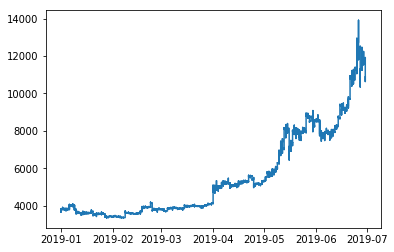

In [50]:
plt.plot(train_price_data1["Date"],train_price_data1["Price"])
plt.show()

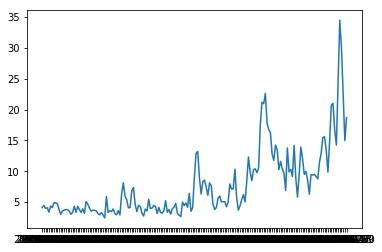

In [51]:
plt.plot(time,result1)
plt.show()

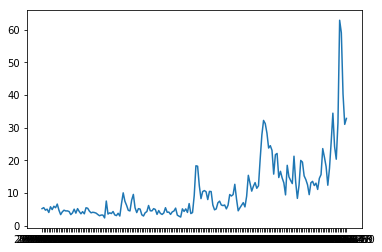

In [52]:
plt.plot(time,result2)
plt.show()

## ***************** End *************************

# 2020/01/01 - 2020/06/30

## 2.1 News

In [53]:
mask2 = (mean_scored_news['Date'] >= '2020-1-1') & (mean_scored_news['Date'] <= '2020-6-30')
train_data2 = mean_scored_news.loc[mask2] #Index(['Date', 'compound', 'neg', 'neu', 'pos'], dtype='object')
train_data2

,Date,compound,neg,neu,pos
369,2020-01-01,0.526360,0.048800,0.872000,0.079200
370,2020-01-02,0.526911,0.040222,0.885444,0.074444
371,2020-01-03,0.074850,0.058167,0.878333,0.063833
372,2020-01-04,0.170560,0.044000,0.890400,0.065600
373,2020-01-05,0.655617,0.045000,0.880167,0.074667
374,2020-01-06,0.655800,0.032889,0.887556,0.079556
375,2020-01-07,0.332867,0.036833,0.905000,0.058167
376,2020-01-08,0.922578,0.037667,0.873000,0.089444
377,2020-01-09,0.022525,0.066750,0.832000,0.101250
378,2020-01-10,0.919420,0.027800,0.900400,0.071800


In [54]:
train_data2.to_csv("new_score_2020.csv",index=False)

In [55]:
score_data2 = pd.read_csv('new_score_2020.csv')
score_data2

,Date,compound,neg,neu,pos
0,2020-01-01,0.526360,0.048800,0.872000,0.079200
1,2020-01-02,0.526911,0.040222,0.885444,0.074444
2,2020-01-03,0.074850,0.058167,0.878333,0.063833
3,2020-01-04,0.170560,0.044000,0.890400,0.065600
4,2020-01-05,0.655617,0.045000,0.880167,0.074667
5,2020-01-06,0.655800,0.032889,0.887556,0.079556
6,2020-01-07,0.332867,0.036833,0.905000,0.058167
7,2020-01-08,0.922578,0.037667,0.873000,0.089444
8,2020-01-09,0.022525,0.066750,0.832000,0.101250
9,2020-01-10,0.919420,0.027800,0.900400,0.071800


## 2.2 Google Trends

In [56]:
google_trends_2020_data = pd.read_csv('data_googletrends2020.csv')
google_trends_2020_data.head()

,Date,Interest
0,2020-01-01,11
1,2020-01-02,11
2,2020-01-03,11
3,2020-01-04,11
4,2020-01-05,11


## 2.3 S2F Model

In [57]:
s2f_2020_data = pd.read_csv('data_btc_cir2020.csv')
s2f_2020_data

,Date,Cir
0,2020-01-01,18137650.00
1,2020-01-02,18137650.00
2,2020-01-03,18143375.00
3,2020-01-04,18143375.00
4,2020-01-05,18143375.00
5,2020-01-06,18149062.50
6,2020-01-07,18149062.50
7,2020-01-08,18149062.50
8,2020-01-09,18154775.00
9,2020-01-10,18154775.00


In [58]:
s2f_2020_data["s2f"] = 21000000 / s2f_2020_data["Cir"]
s2f_2020_data.head()

,Date,Cir,s2f
0,2020-01-01,18137650.0,1.157813
1,2020-01-02,18137650.0,1.157813
2,2020-01-03,18143375.0,1.157447
3,2020-01-04,18143375.0,1.157447
4,2020-01-05,18143375.0,1.157447


## 2.4 Volatility

In [59]:
volat_2020_data = pd.read_csv('data_price_volatility2020.csv')
volat_2020_data.head()

,Date,Volatility
0,2020-01-01,6.323892
1,2020-01-02,9.916339
2,2020-01-03,19.517547
3,2020-01-04,9.634264
4,2020-01-05,9.870645


## 2.5 Volume

In [60]:
all_volume_data = pd.read_csv("all_k_line.txt")
all_volume_data.head()

,Time,Price,Volume,Change
0,1514736000,13371.5,293805,-0.32
1,1514736060,13405.5,219089,-0.25
2,1514736120,13450.0,651858,-0.33
3,1514736180,13528.0,1433129,-0.58
4,1514736240,13616.0,4301649,-0.65


In [61]:
from datetime import datetime
all_volume_data['Time'] = [datetime.fromtimestamp(x) for x in all_volume_data['Time']]
all_volume_data[['Date','Time']] = all_volume_data['Time'].astype(str).str.split(' ',expand=True)
all_volume_data

,Time,Price,Volume,Change,Date
0,08:00:00,13371.5,293805,-0.32,2017-12-31
1,08:01:00,13405.5,219089,-0.25,2017-12-31
2,08:02:00,13450.0,651858,-0.33,2017-12-31
3,08:03:00,13528.0,1433129,-0.58,2017-12-31
4,08:04:00,13616.0,4301649,-0.65,2017-12-31
5,08:05:00,13683.0,2993575,-0.49,2017-12-31
6,08:06:00,13705.0,3148908,-0.16,2017-12-31
7,08:07:00,13687.0,4065627,0.13,2017-12-31
8,08:08:00,13690.0,2341692,-0.02,2017-12-31
9,08:09:00,13705.5,884267,-0.11,2017-12-31


In [62]:
all_volume_data = all_volume_data[['Date', ' Volume']]
group_all_volume_data = all_volume_data.groupby("Date")
sum_all_volume = group_all_volume_data.sum()
sum_all_volume = sum_all_volume.reset_index()
sum_all_volume

,Date,Volume
0,2017-12-31,454478678
1,2018-01-01,680516250
2,2018-01-02,944152848
3,2018-01-03,817351695
4,2018-01-04,698479219
5,2018-01-05,1120370625
6,2018-01-06,731720506
7,2018-01-07,959948383
8,2018-01-08,1414220400
9,2018-01-09,1018322163


In [63]:
sum_all_volume['Date'] = pd.to_datetime(sum_all_volume['Date'])
price_mask2 = (sum_all_volume['Date'] >= '2020-1-1') & (sum_all_volume['Date'] <= '2020-6-30')
train_volume_data2 = sum_all_volume.loc[price_mask2]
train_volume_data2

,Date,Volume
731,2020-01-01,963079957
732,2020-01-02,2188978952
733,2020-01-03,2196560701
734,2020-01-04,1546340299
735,2020-01-05,1682613311
736,2020-01-06,2730789332
737,2020-01-07,4477629227
738,2020-01-08,3832670454
739,2020-01-09,2452654274
740,2020-01-10,4082675403


In [64]:
train_volume_data2.to_csv("new_volume2020.csv",index=False)

In [65]:
update_volume2020 = pd.read_csv("update_volume2020.csv")
update_volume2020

,Date,Volume,Volume (in 100 million)
0,2020-01-01,963079957,9.63
1,2020-01-02,2188978952,21.89
2,2020-01-03,2196560701,21.97
3,2020-01-04,1546340299,15.46
4,2020-01-05,1682613311,16.83
5,2020-01-06,2730789332,27.31
6,2020-01-07,4477629227,44.78
7,2020-01-08,3832670454,38.33
8,2020-01-09,2452654274,24.53
9,2020-01-10,4082675403,40.83


## 2.6. 市场占有率

In [66]:
total_market_data2020 = pd.read_csv("data_all_market_2020.csv")
total_market_data2020.head()

,Time,Market_value,Market_value (1000 million),Volume,Volume (100 million),Price
0,1577865600,190848172099,19.08,56191969499,56.19,0
1,1577872800,191155184949,19.12,55756592786,55.76,0
2,1577880000,191439343856,19.14,56138545240,56.14,0
3,1577887200,191739904245,19.17,54896549590,54.90,0
4,1577894400,192031696399,19.20,51617571124,51.62,0


In [67]:
btc_market_data2020 = pd.read_csv("data_btc_2020.csv")
btc_market_data2020.head()

,Time,Market_value,Market_value (1000 million),Volume,Volume (100 million),Price
0,1577865600,130145266526,13.01,17728724559,17.73,7196.260271
1,1577872800,130298529036,13.03,17569286256,17.57,7204.734777
2,1577880000,130471164860,13.05,17700846510,17.70,7214.280513
3,1577887200,130633869795,13.06,17285779612,17.29,7223.277129
4,1577894400,130800844006,13.08,16272818875,16.27,7232.509812


In [68]:
from datetime import datetime
total_market_data2020['Time'] = [datetime.fromtimestamp(x) for x in total_market_data2020['Time']]
total_market_data2020[['Date','Time']] = total_market_data2020['Time'].astype(str).str.split(' ',expand=True)
total_market_data2020

,Time,Market_value,Market_value (1000 million),Volume,Volume (100 million),Price,Date
0,00:00:00,190848172099,19.08,56191969499,56.19,0,2020-01-01
1,02:00:00,191155184949,19.12,55756592786,55.76,0,2020-01-01
2,04:00:00,191439343856,19.14,56138545240,56.14,0,2020-01-01
3,06:00:00,191739904245,19.17,54896549590,54.90,0,2020-01-01
4,08:00:00,192031696399,19.20,51617571124,51.62,0,2020-01-01
5,08:00:00,191612881412,19.16,51618453204,51.62,0,2020-01-01
6,10:00:00,192024627756,19.20,50470909205,50.47,0,2020-01-01
7,12:00:00,192236327063,19.22,50326958358,50.33,0,2020-01-01
8,14:00:00,191475999842,19.15,50434835652,50.43,0,2020-01-01
9,16:00:00,191301133944,19.13,50518700865,50.52,0,2020-01-01


In [69]:
total_market_data2020 = total_market_data2020[['Date', 'Market_value (1000 million)']]
group_market_data2020 = total_market_data2020.groupby("Date")
sum_total_market2020 = group_market_data2020.sum()
sum_total_market2020 = sum_total_market2020.reset_index()
sum_total_market2020.head()

,Date,Market_value (1000 million)
0,2020-01-01,248.48
1,2020-01-02,224.79
2,2020-01-03,232.55
3,2020-01-04,273.37
4,2020-01-05,257.18


In [70]:
sum_total_market2020.to_csv("new_market2020.csv",index=False)

In [71]:
update_market2020 = pd.read_csv("new_market2020.csv")
update_market2020

,Date,Market_value (1000 million)
0,2020-01-01,248.48
1,2020-01-02,224.79
2,2020-01-03,232.55
3,2020-01-04,273.37
4,2020-01-05,257.18
5,2020-01-06,245.22
6,2020-01-07,254.50
7,2020-01-08,254.46
8,2020-01-09,309.37
9,2020-01-10,253.64


In [72]:
from datetime import datetime
btc_market_data2020['Time'] = [datetime.fromtimestamp(x) for x in btc_market_data2020['Time']]
btc_market_data2020[['Date','Time']] = btc_market_data2020['Time'].astype(str).str.split(' ',expand=True)
btc_market_data2020

,Time,Market_value,Market_value (1000 million),Volume,Volume (100 million),Price,Date
0,00:00:00,130145266526,13.01,17728724559,17.73,7196.260271,2020-01-01
1,02:00:00,130298529036,13.03,17569286256,17.57,7204.734777,2020-01-01
2,04:00:00,130471164860,13.05,17700846510,17.70,7214.280513,2020-01-01
3,06:00:00,130633869795,13.06,17285779612,17.29,7223.277129,2020-01-01
4,08:00:00,130800844006,13.08,16272818875,16.27,7232.509812,2020-01-01
5,10:00:00,130846302362,13.08,15922307448,15.92,7235.023389,2020-01-01
6,12:00:00,131018595291,13.10,15946094795,15.95,7244.550164,2020-01-01
7,14:00:00,130556597550,13.06,15951238354,15.95,7219.004433,2020-01-01
8,16:00:00,130453713586,13.05,15963345873,15.96,7213.315561,2020-01-01
9,18:00:00,129856072958,12.99,15921720640,15.92,7180.269584,2020-01-01


In [73]:
btc_market_data2020 = btc_market_data2020[['Date', 'Market_value (1000 million)']]
group_btc_data2020 = btc_market_data2020.groupby("Date")
sum_btc_market2020 = group_btc_data2020.sum()
sum_btc_market2020 = sum_btc_market2020.reset_index()
sum_btc_market2020.head()

,Date,Market_value (1000 million)
0,2020-01-01,156.34
1,2020-01-02,153.31
2,2020-01-03,158.80
3,2020-01-04,159.93
4,2020-01-05,161.65


In [74]:
sum_btc_market2020.to_csv("new_btc_market2020.csv",index=False)

In [75]:
update_btc_market2020 = pd.read_csv("new_btc_market2020.csv")
update_btc_market2020

,Date,Market_value (1000 million)
0,2020-01-01,156.34
1,2020-01-02,153.31
2,2020-01-03,158.80
3,2020-01-04,159.93
4,2020-01-05,161.65
5,2020-01-06,166.41
6,2020-01-07,175.16
7,2020-01-08,176.02
8,2020-01-09,170.22
9,2020-01-10,173.75


In [76]:
market_dominance2020 = pd.read_csv("data_dominance_2020.csv")
market_dominance2020

,Date,Market_value (1000 million),btc_Market_value (1000 million),dominance
0,2020-01-01,248.48,156.34,0.63
1,2020-01-02,224.79,153.31,0.68
2,2020-01-03,232.55,158.80,0.68
3,2020-01-04,273.37,159.93,0.59
4,2020-01-05,257.18,161.65,0.63
5,2020-01-06,245.22,166.41,0.68
6,2020-01-07,254.50,175.16,0.69
7,2020-01-08,254.46,176.02,0.69
8,2020-01-09,309.37,170.22,0.55
9,2020-01-10,253.64,173.75,0.69


## Price

In [77]:
parsed_price_data['Date'] = pd.to_datetime(parsed_price_data['Date'])
price_mask2 = (parsed_price_data['Date'] >= '2020-1-1') & (parsed_price_data['Date'] <= '2020-6-30')
train_price_data2 = parsed_price_data.loc[price_mask2]
train_price_data2

,Time,Price,Date
1056201,00:00:00,7183.0,2020-01-01
1056202,00:01:00,7180.5,2020-01-01
1056203,00:02:00,7180.5,2020-01-01
1056204,00:03:00,7180.5,2020-01-01
1056205,00:04:00,7180.5,2020-01-01
1056206,00:05:00,7180.5,2020-01-01
1056207,00:06:00,7180.5,2020-01-01
1056208,00:07:00,7181.0,2020-01-01
1056209,00:08:00,7180.5,2020-01-01
1056210,00:09:00,7180.5,2020-01-01


## 指数 ：
## change_sign * (S2F * 15% + 每天新闻情感分数值 * 15% + (Google搜索量) * 10% + 每天波动率 （price volatility）* 25% + 每天交易量 （volume）* 25% + 市场占有率(Market Dominance) * 10%)

In [78]:
result3 = (s2f_2020_data["s2f"] * 0.15 + google_trends_2020_data["Interest"] * 0.1 + volat_2020_data["Volatility"] * 0.25 + score_data2["compound"] * 0.15 + update_volume2020["Volume (in 100 million)"] * 0.25 + market_dominance2020["dominance"] * 0.1)
result3

0       3.823126
1       6.893209
2       6.845345
3       5.223201
4       5.642460
5       8.267433
6      12.587493
7      11.063449
8       7.464387
9      11.687921
10      6.599805
11      5.224585
12      8.065162
13     14.224188
14      9.125639
15      8.851962
16      8.829105
17      7.234940
18      8.868248
19      5.885425
20      6.150818
21      5.615510
22      7.776886
23      8.045057
24      4.251402
25      6.309642
26     11.086985
27     11.745282
28      8.585614
29     11.072181
         ...    
152     7.475932
153     7.134987
154     3.955687
155     5.712824
156     5.178162
157     3.604839
158     6.058076
159     5.085049
160     3.790524
161     6.047372
162     7.333950
163     4.058155
164     3.085351
165     5.567148
166     5.805138
167     4.104789
168     4.507893
169     4.091495
170     4.063956
171     3.650754
172     3.357940
173     4.480936
174     3.255213
175     7.223825
176     3.993964
177     4.595791
178     4.170899
179     3.2809

In [79]:
result4 = s2f_2020_data["s2f"] * 0.20 + google_trends_2020_data["Interest"] * 0.15 + score_data2["compound"] * 0.2 + update_volume2020["Volume (in 100 million)"] * 0.25 + market_dominance2020["dominance"] * 0.2
result4

0       4.520335
1       7.595445
2       7.524959
3       5.898601
4       6.346113
5       8.976077
6      13.280990
7      11.786432
8       8.128349
9      12.410728
10      7.304240
11      5.922280
12      8.730549
13     14.886918
14      9.792351
15      9.504949
16      9.501139
17      7.875254
18      9.526497
19      6.543734
20      6.795924
21      6.268846
22      8.409014
23      8.690743
24      4.887537
25      6.982690
26     11.741646
27     12.411042
28      9.244652
29     11.727574
         ...    
152     8.175409
153     7.826650
154     4.640082
155     6.412932
156     5.875883
157     4.294119
158     6.753434
159     5.714399
160     4.414866
161     6.703329
162     7.965433
163     4.681041
164     3.740635
165     6.209697
166     6.430184
167     4.741386
168     5.151524
169     4.730494
170     4.699609
171     4.298672
172     4.014920
173     5.125581
174     3.892117
175     7.876100
176     4.637952
177     5.235388
178     4.810532
179     3.9305

In [80]:
time = update_volume2020["Date"]

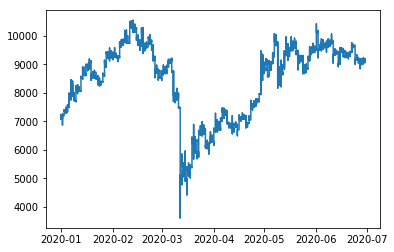

In [81]:
plt.plot(train_price_data2["Date"],train_price_data2["Price"])
plt.show()

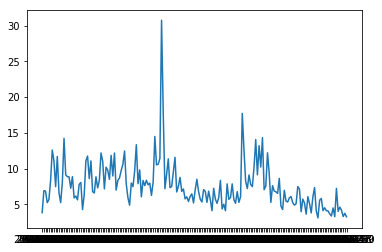

In [82]:
plt.plot(time,result3)
plt.show()

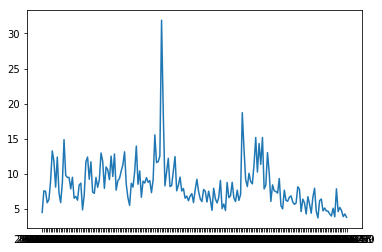

In [83]:
plt.plot(time,result4)
plt.show()

In [4]:
news_data = pd.read_csv("news_update.json")
news_data.head()

ParserError: Error tokenizing data. C error: Expected 1 fields in line 3, saw 2
